In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical

train = pd.read_csv('C:/Users/s_csmscox/jupyterSave/digital_train.csv')
test = pd.read_csv('C:/Users/s_csmscox/jupyterSave/digital_test.csv')

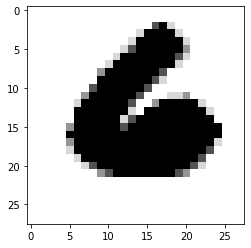

In [2]:
img_data = train.drop('label', axis=1, inplace=False).values

plt.imshow(img_data[500].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [3]:
train_label = train['label']
train.drop(['label'], axis=1, inplace=True)

# 정규화
scaler_train = MinMaxScaler()
scaler_train.fit(train)
x_data_train_norm = scaler_train.transform(train)

scaler_test = MinMaxScaler()
scaler_test.fit(test)
x_data_test_norm = scaler_test.transform(test)

#one hot encoding
t_data_train_onehot = to_categorical(train_label)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
# loss가 'categorical_crossentropy' => onehot 인코딩 필요
# loss가 'sparse_categorical_crossentropy' => onehot 인코딩 불필요
model.compile(optimizer=Adam(learning_rate=1e-2), loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_data_train_norm, t_data_train_onehot, epochs=200, verbose=1,
                   validation_split=0.3, batch_size=10000)

Epoch 1/200
3/3 [==============================] - 1s 205ms/step - loss: 5.3236 - accuracy: 0.1277 - val_loss: 2.6158 - val_accuracy: 0.2716
Epoch 2/200
3/3 [==============================] - 0s 165ms/step - loss: 2.4095 - accuracy: 0.2858 - val_loss: 1.9708 - val_accuracy: 0.3509
Epoch 3/200
3/3 [==============================] - 0s 163ms/step - loss: 1.8614 - accuracy: 0.3573 - val_loss: 1.4563 - val_accuracy: 0.5477
Epoch 4/200
3/3 [==============================] - 0s 157ms/step - loss: 1.3982 - accuracy: 0.5273 - val_loss: 1.0215 - val_accuracy: 0.6250
Epoch 5/200
3/3 [==============================] - 0s 162ms/step - loss: 1.0842 - accuracy: 0.6307 - val_loss: 0.7813 - val_accuracy: 0.7680
Epoch 6/200
3/3 [==============================] - 0s 161ms/step - loss: 0.8790 - accuracy: 0.7108 - val_loss: 0.5810 - val_accuracy: 0.8374
Epoch 7/200
3/3 [==============================] - 0s 160ms/step - loss: 0.6972 - accuracy: 0.7796 - val_loss: 0.4929 - val_accuracy: 0.8652
Epoch 8/200
3

KeyboardInterrupt: 

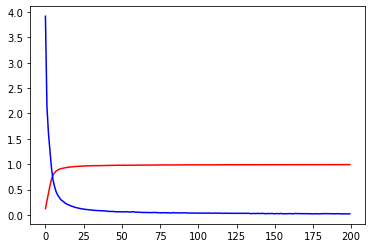

In [14]:
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['loss'], color='b')
plt.show()

In [15]:
result = model.predict(x_data_test_norm)
ans = []

for i in result:
    m = i.max()
    for j in range(10):
        if i[j] == m:
            ans.append(j)
            break

sub = pd.read_csv('C:/Users/s_csmscox/jupyterSave/sample_submission.csv')
sub['Label'] = ans
sub.to_csv('C:/Users/s_csmscox/jupyterSave/sample_submission9.csv', index=False)